In [2]:
QDRANT_API_KEY = "9YGZgLt7G8BWdknYj2cZnxzih6veL7QMToIF07AInCm11sLbJkhVmw"
QDRANT_URL = "https://9a89039d-8209-4a4e-aabd-511a9155739c.us-east-1-0.aws.cloud.qdrant.io"
QDRANT_COLLECTION_NAME = "nornikel_2024_team_hakuna_matata"

In [3]:
import sys
sys.path.insert(0, '..')
from src.NornikelPdfLoader import NornikelPdfLoader
from src.ColQwen2Embeddings import ColQwen2Embeddings

/tmp/ipykernel_32018/3875427789.py:4: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from src.ColQwen2Embeddings import ColQwen2Embeddings


In [4]:
embeddings = ColQwen2Embeddings()

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]


In [5]:
from langchain_qdrant import QdrantVectorStore

In [6]:
qdrant = QdrantVectorStore.from_existing_collection(
    embedding=embeddings,
    collection_name=QDRANT_COLLECTION_NAME,
    url=QDRANT_URL,
    api_key=QDRANT_API_KEY
)

In [7]:
qdrant.similarity_search("Долевое участие металлов в EBITDA компании? То есть какой % EBITDA и EBITDA margin принесли продажи Ni, Cu и т д", 
                         k=5)

[Document(metadata={'source': 'Доклад, уголь часть 1.pdf', 'page': 13, 'type': 'text', '/Producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', '/ModDate': 'D:20241016224200Z', '/Creator': '1', '/CreationDate': 'D:20241016224200Z', '/Title': 'Доклад №1', '/Author': '1', '/Keywords': 'DAFseJ6uM3c BAFlQ5Z3D20', '/Subject': '', '_id': '4ad03c5c-ae52-4eb5-836a-9ad2aa882abb', '_collection_name': 'nornikel_2024_team_hakuna_matata'}, page_content='Рис. 18. Соотношение налоговой нагрузки и рентабельности продаж по отраслям в 2022 г.\nИсточник: Росстат\n12\nСравнение рентабельности продаж и инвестиционной активности отраслей (Рис. 19)\nэкономики позволяет сделать вывод о низкой инвестиционной активности угледобывающей\nотрасли, которая составляет 24% при среднем уровне реинвестирования в стране 68%. \nПри этом у нефтедобывающей отрасли инвестиционная активность составляет 63%, \nа у газодобывающей отрасли – 135% (Рис.19). \nИсточник: Росстат\nРис. 19. Соотношение инвестиционной активности и

In [8]:
from qdrant_client import models

In [9]:
retriever_text = qdrant.as_retriever(search_type="mmr", 
                                search_kwargs={"k": 14,
    "filter": models.Filter(
        should=[
            models.FieldCondition(
                key="metadata.type",
                match=models.MatchValue(
                    value="text"
                ),
            ),
        ]
    )
})
retriever_text.invoke("Долевое участие металлов в EBITDA компании? То есть какой % EBITDA и EBITDA margin принесли продажи Ni, Cu и т д")

[Document(metadata={'source': 'Доклад, уголь часть 1.pdf', 'page': 13, 'type': 'text', '/Producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', '/ModDate': 'D:20241016224200Z', '/Creator': '1', '/CreationDate': 'D:20241016224200Z', '/Title': 'Доклад №1', '/Author': '1', '/Keywords': 'DAFseJ6uM3c BAFlQ5Z3D20', '/Subject': '', '_id': '4ad03c5c-ae52-4eb5-836a-9ad2aa882abb', '_collection_name': 'nornikel_2024_team_hakuna_matata'}, page_content='Рис. 18. Соотношение налоговой нагрузки и рентабельности продаж по отраслям в 2022 г.\nИсточник: Росстат\n12\nСравнение рентабельности продаж и инвестиционной активности отраслей (Рис. 19)\nэкономики позволяет сделать вывод о низкой инвестиционной активности угледобывающей\nотрасли, которая составляет 24% при среднем уровне реинвестирования в стране 68%. \nПри этом у нефтедобывающей отрасли инвестиционная активность составляет 63%, \nа у газодобывающей отрасли – 135% (Рис.19). \nИсточник: Росстат\nРис. 19. Соотношение инвестиционной активности и

[Document(metadata={'source': 'Доклад, уголь часть 1.pdf', 'page': 1, 'type': 'image', '/Producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', '/ModDate': 'D:20241016224200Z', '/Creator': '1', '/CreationDate': 'D:20241016224200Z', '/Title': 'Доклад №1', '/Author': '1', '/Keywords': 'DAFseJ6uM3c BAFlQ5Z3D20', '/Subject': '', 'image_base64': '', '_id': '67071cb5-c285-432e-9956-d71f724052c0', '_collection_name': 'nornikel_2024_team_hakuna_matata'}, page_content='<IMG>'),
 Document(metadata={'source': 'Доклад, уголь часть 1.pdf', 'page': 2, 'type': 'image', '/Producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', '/ModDate': 'D:20241016224200Z', '/Creator': '1', '/CreationDate': 'D:20241016224200Z', '/Title': 'Доклад №1', '/Author': '1', '/Keywords': 'DAFseJ6uM3c BAFlQ5Z3D20', '/Subject': '', 'image_base64': '', '_id': 'fa03c559-8fc5-4aef-983f-c09c417371b8', '_collection_name': 'nornikel_2024_team_hakuna_matata'}, page_content='<IMG>'),
 Document(metadata={'source': 'Доклад, уголь
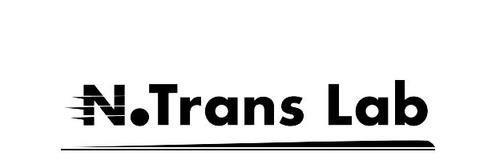
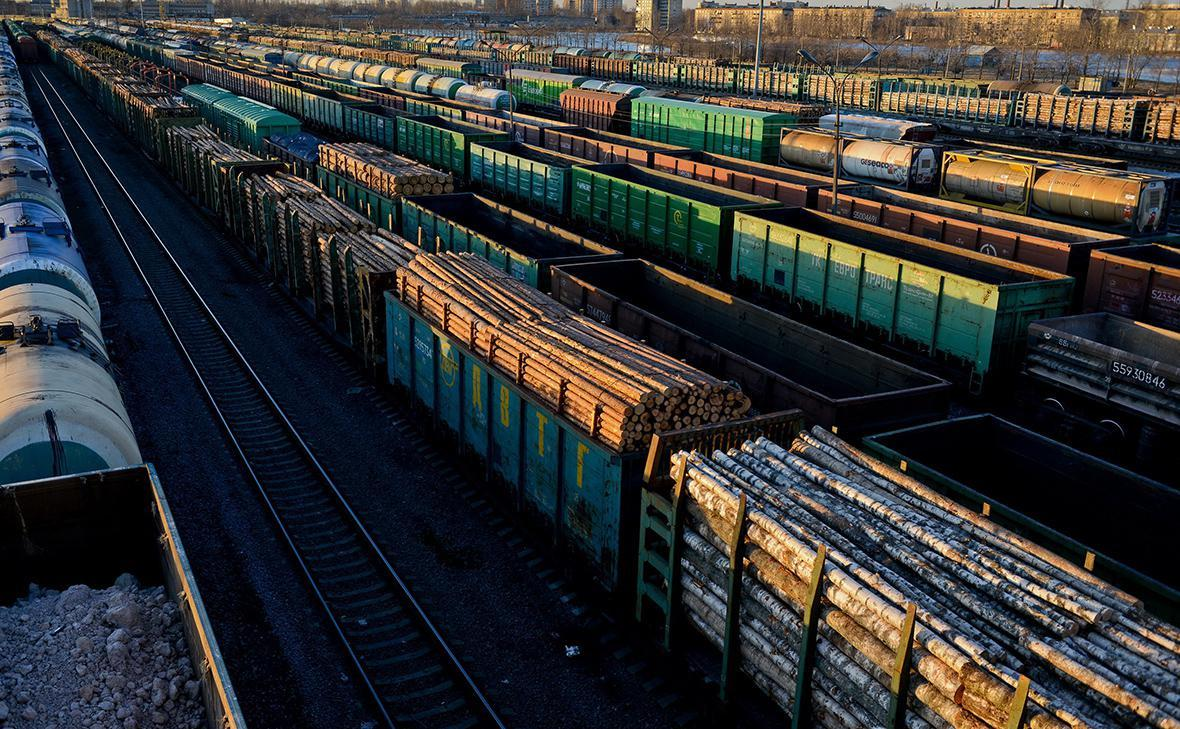
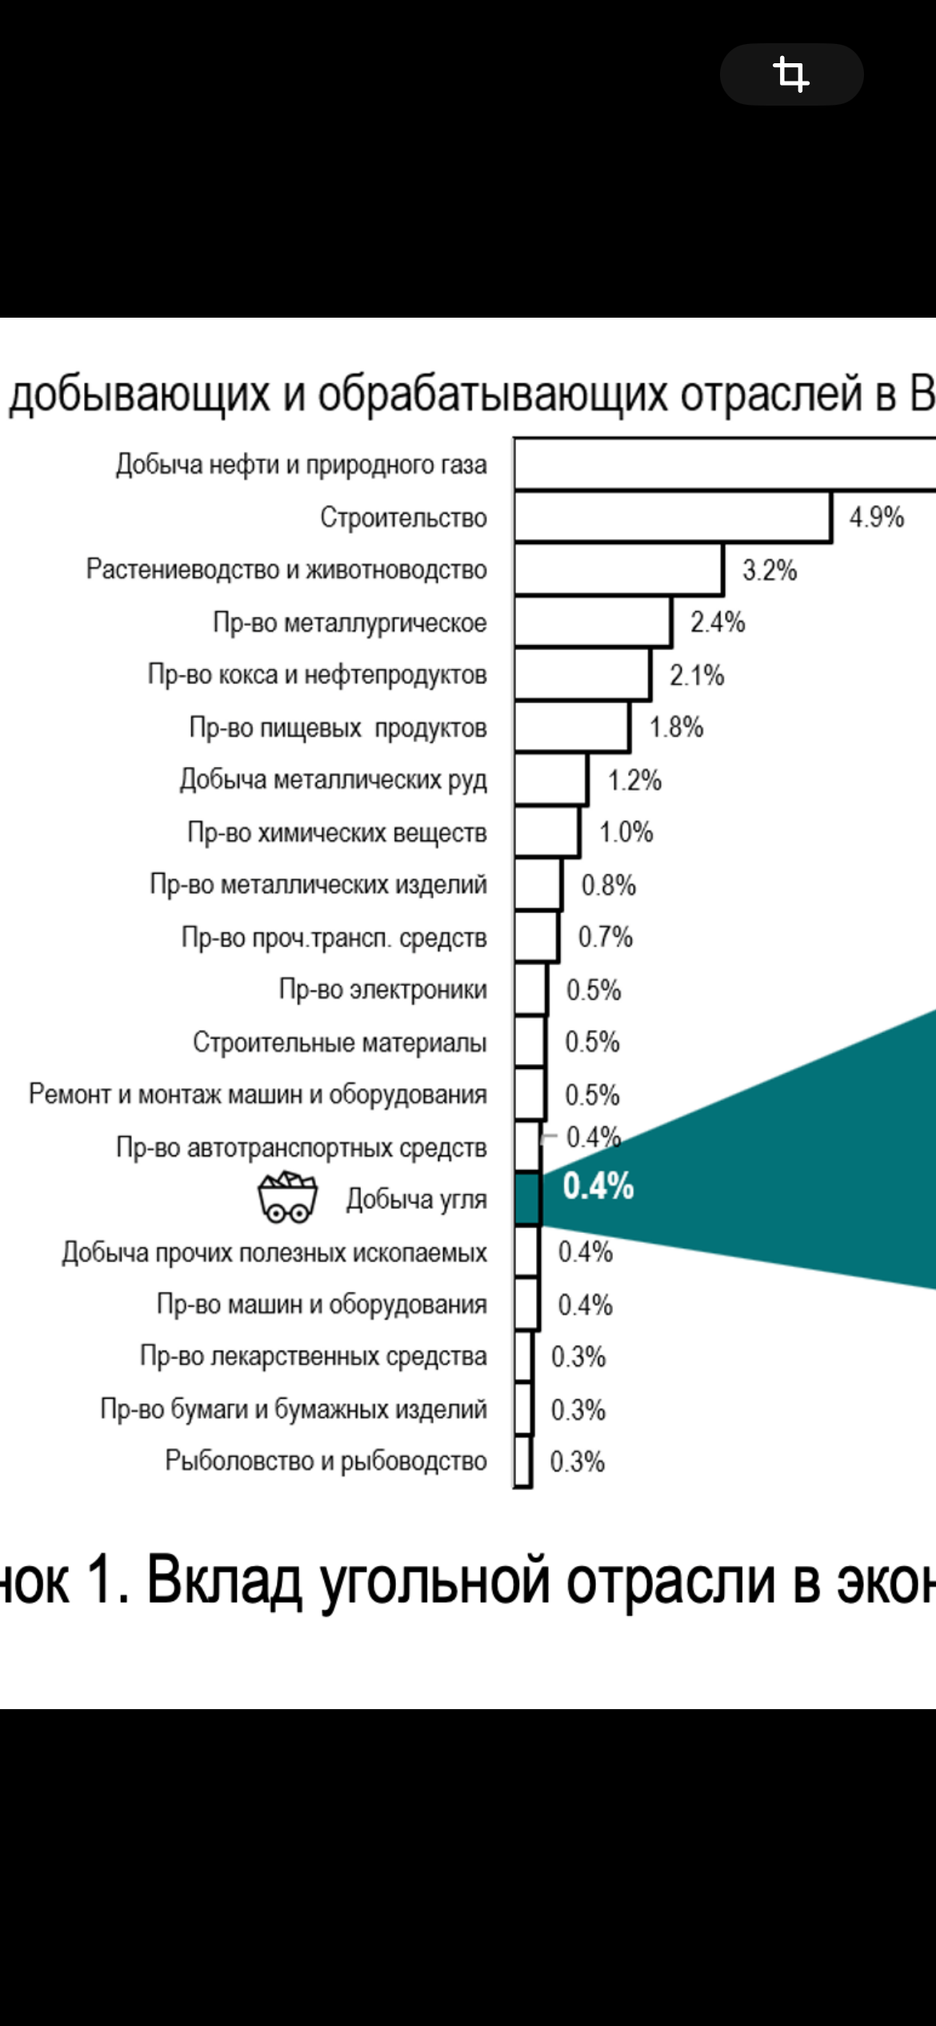
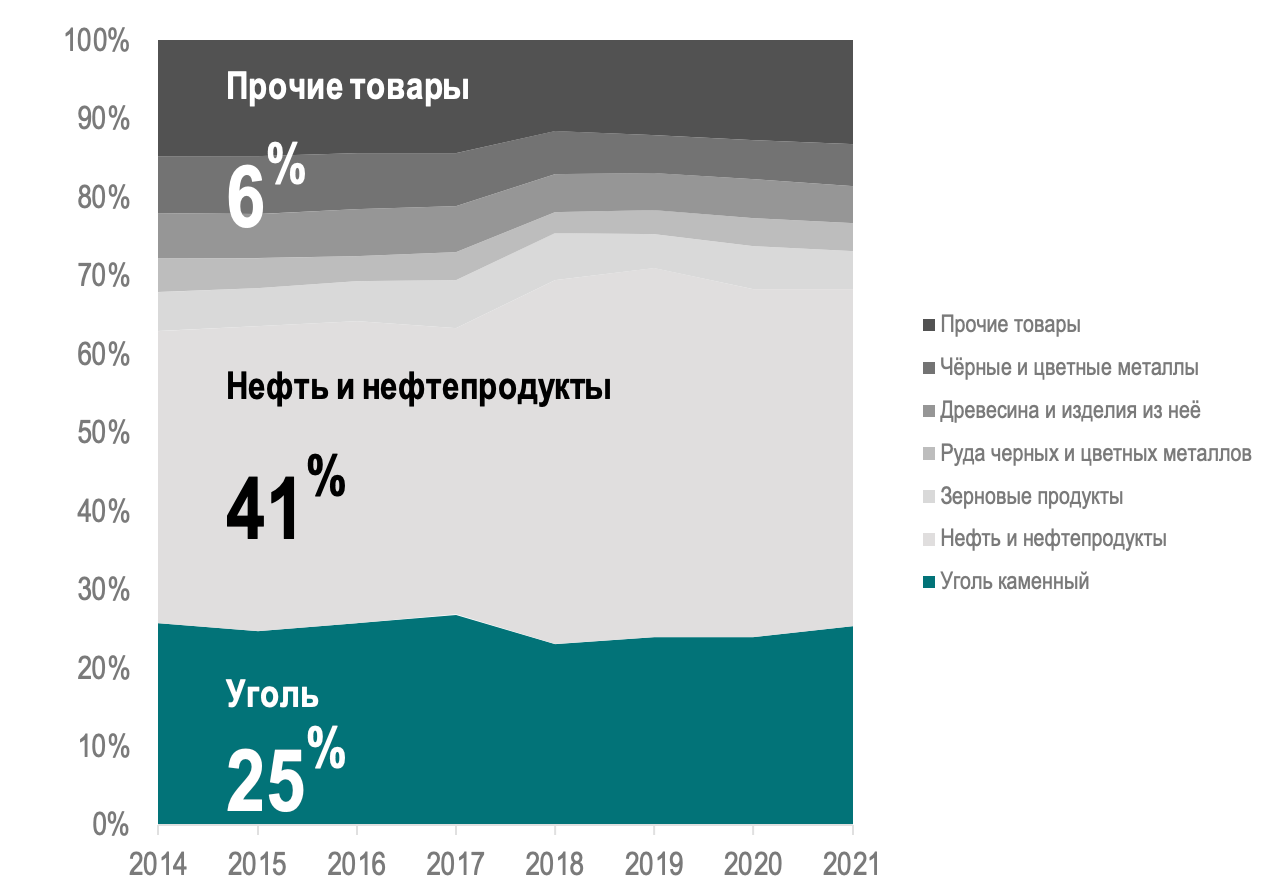
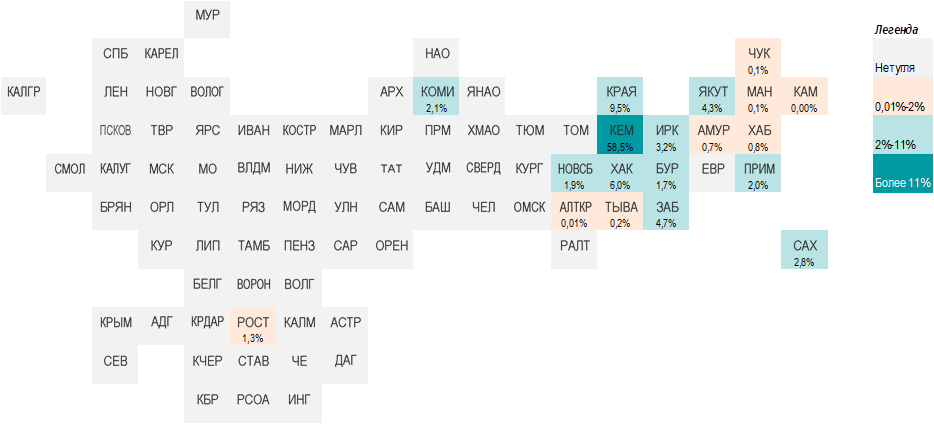
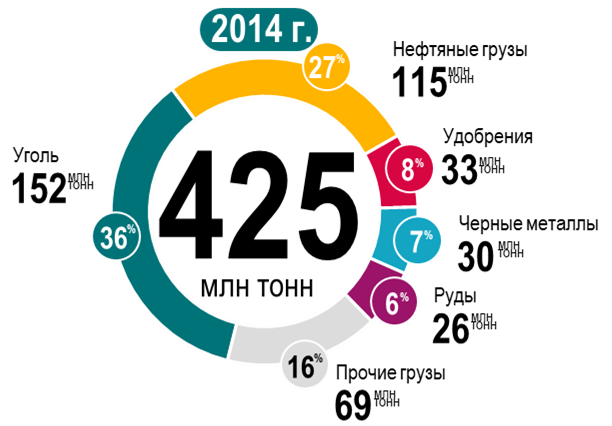
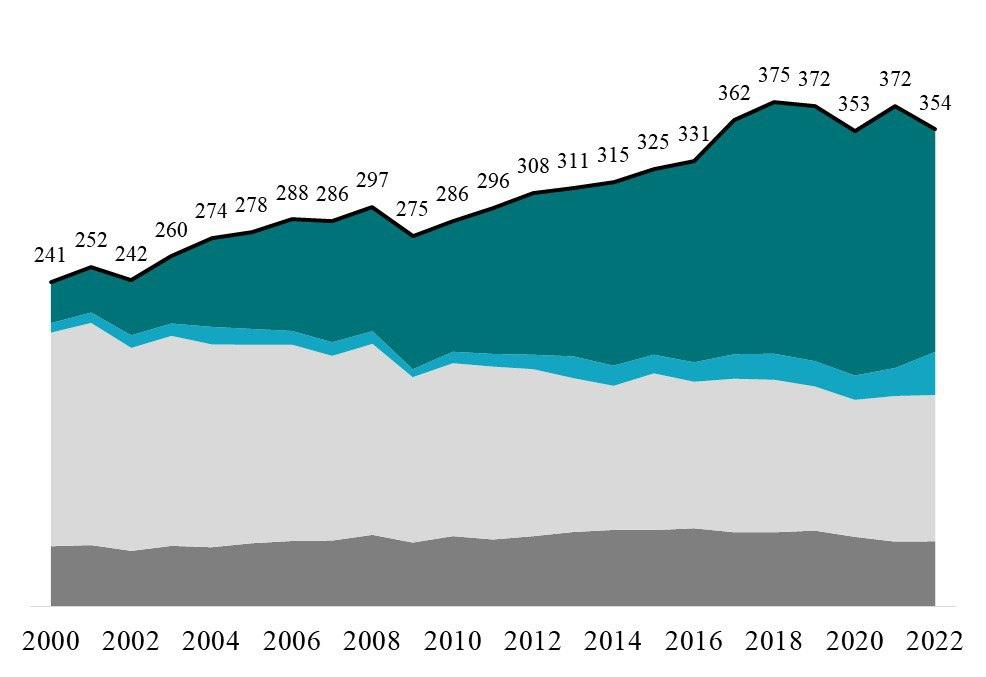
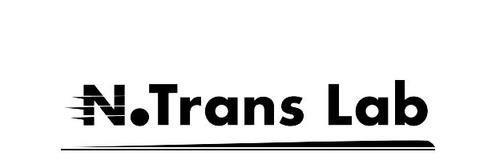
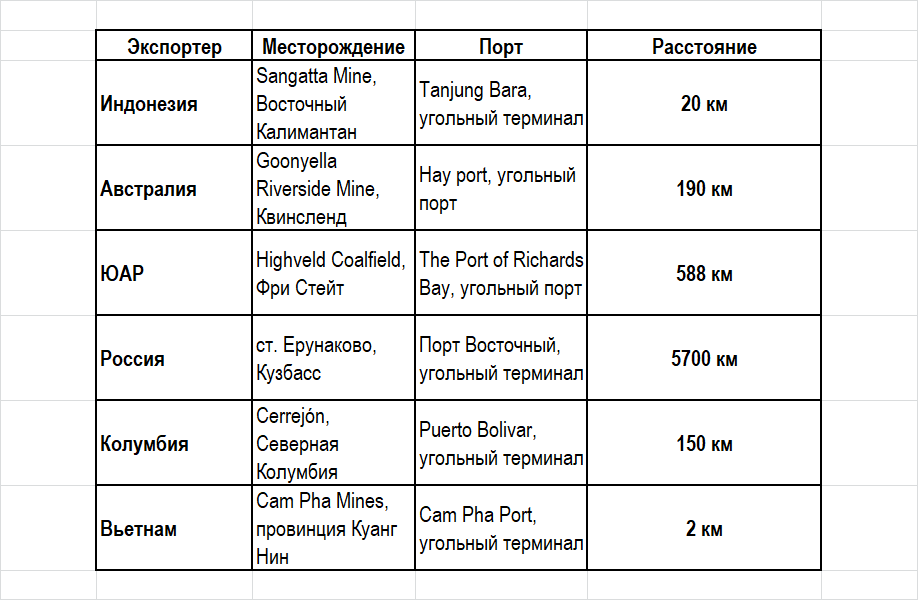
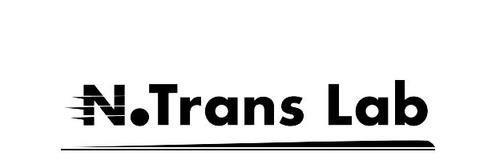
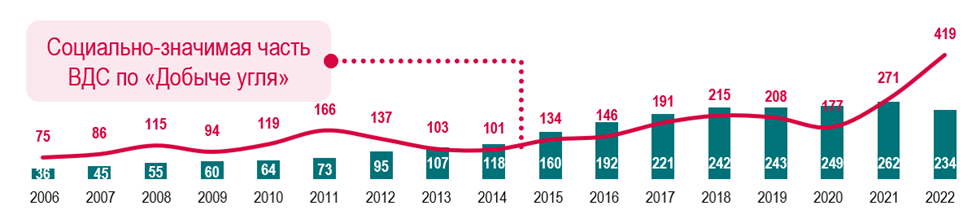
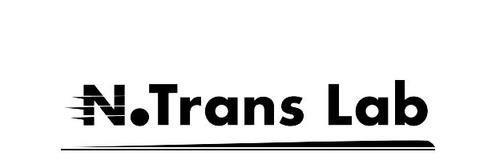
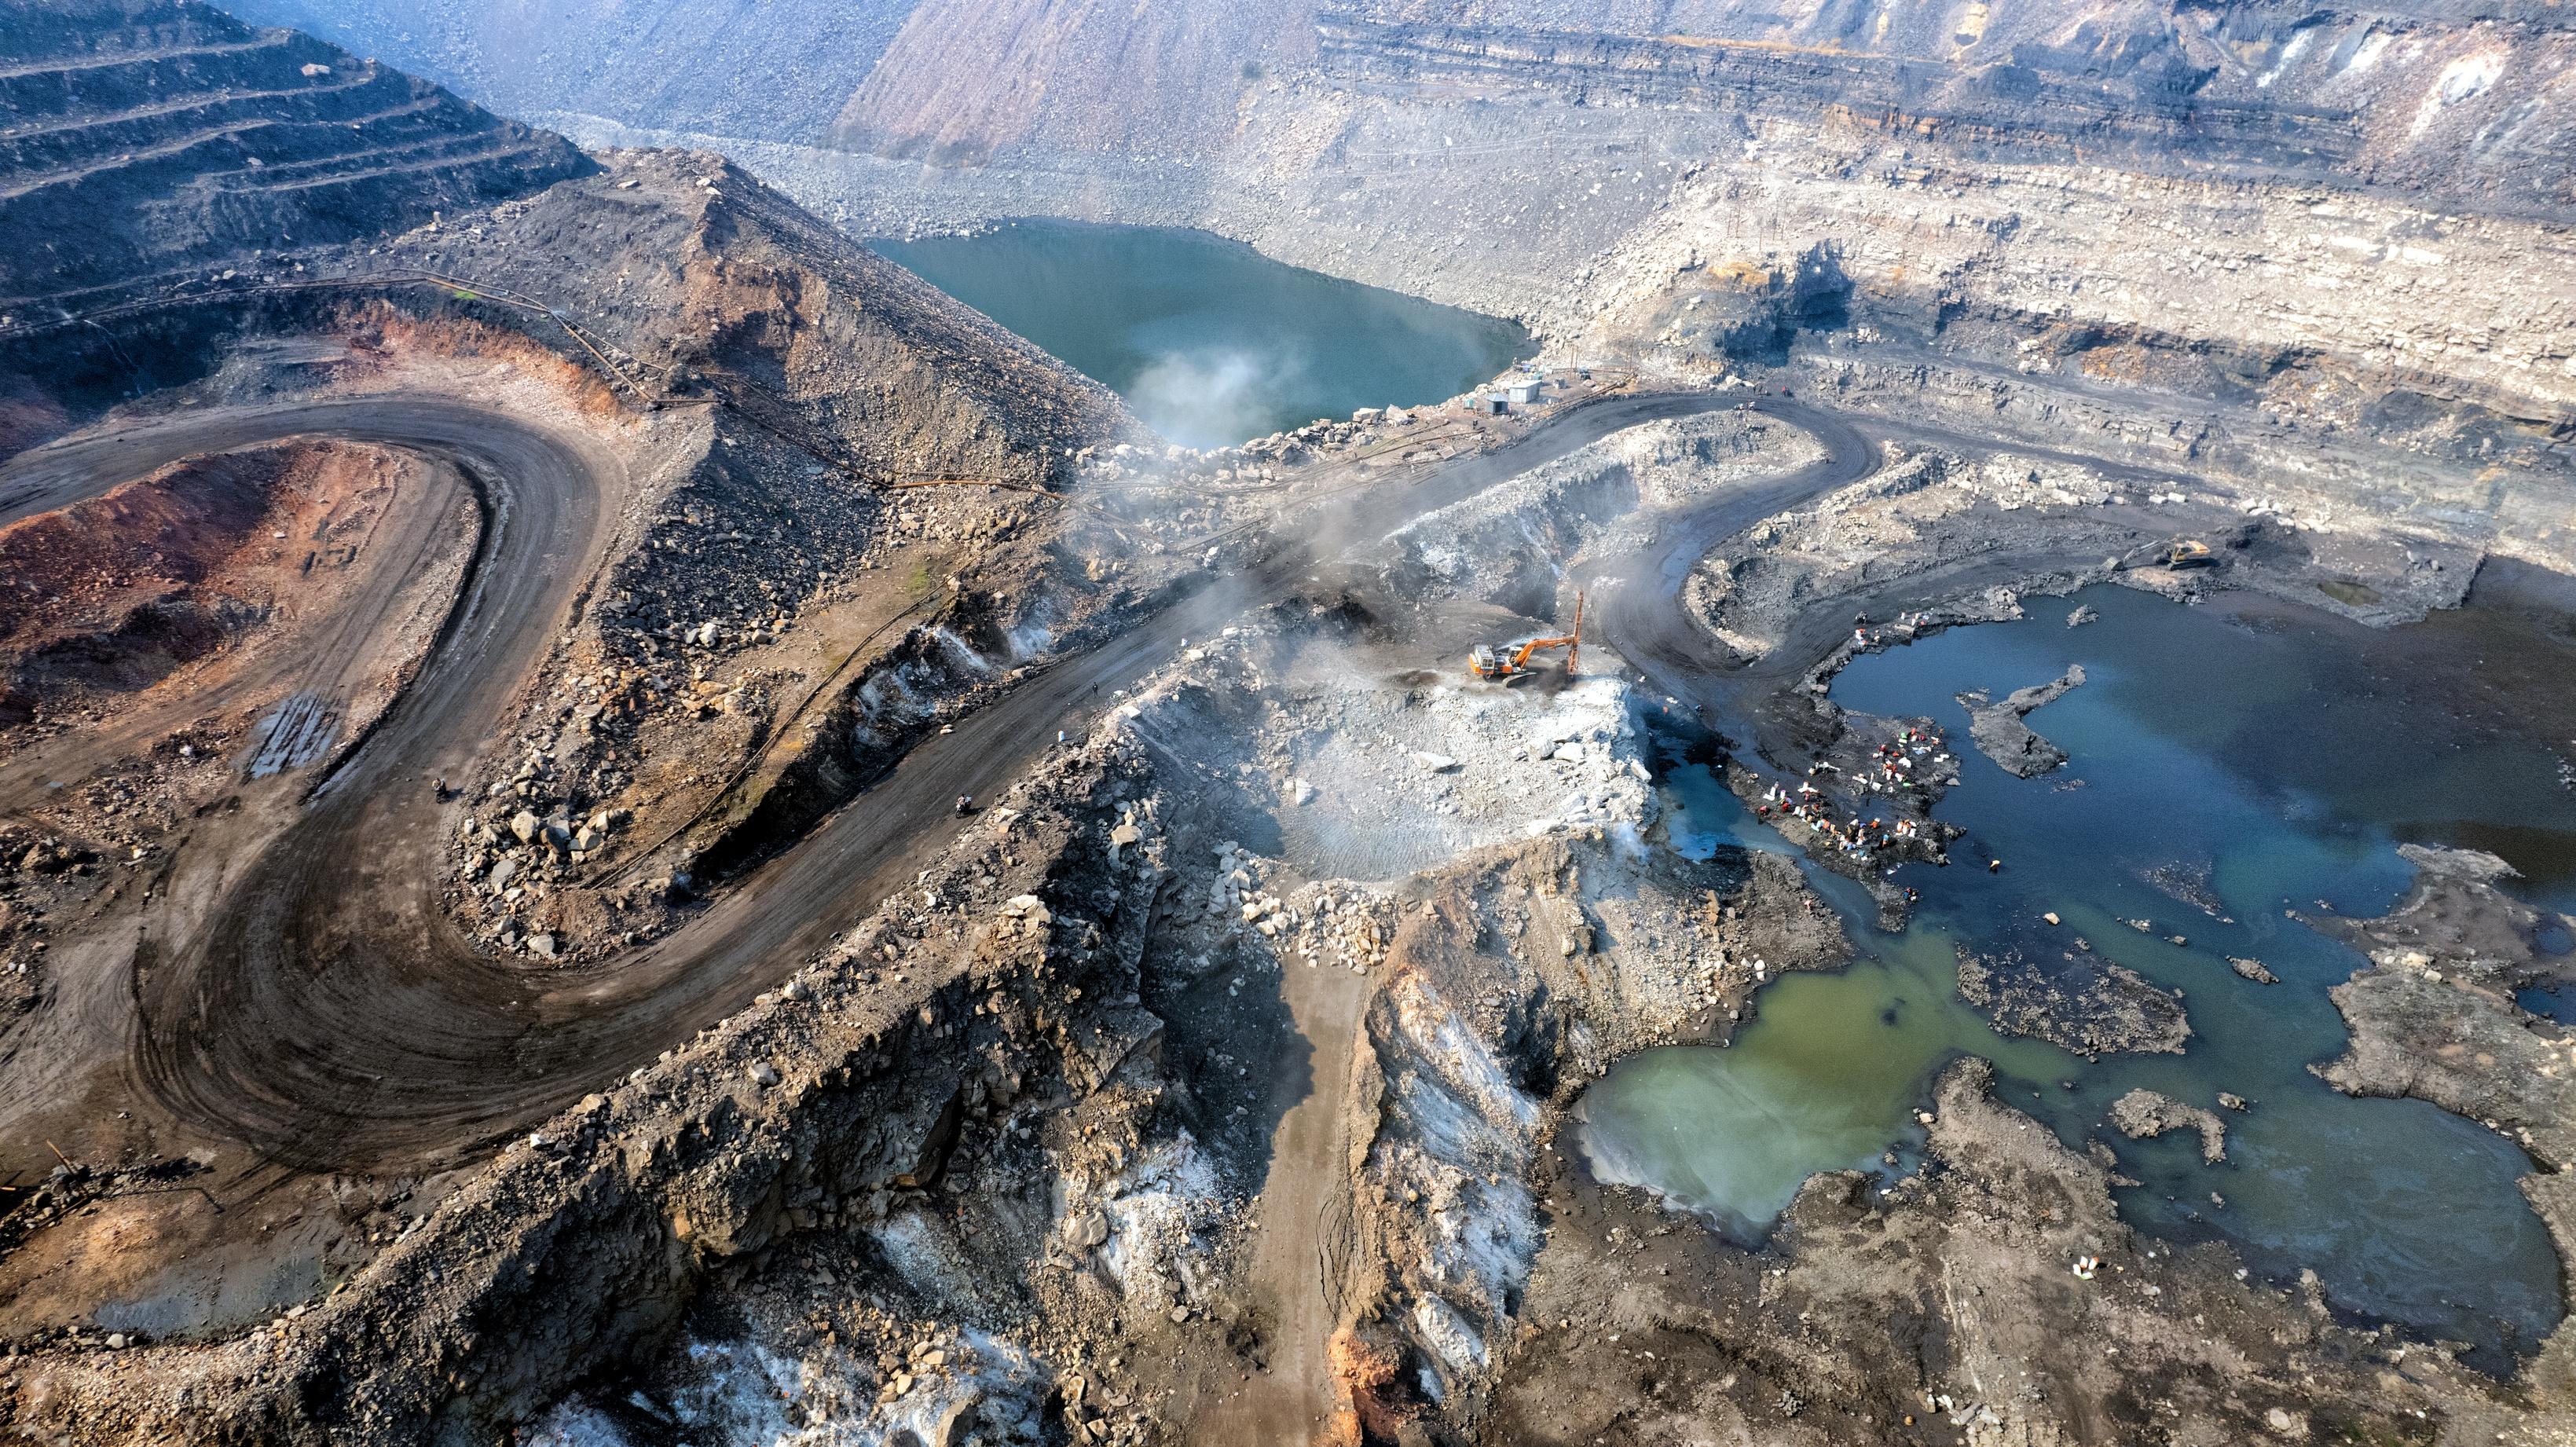
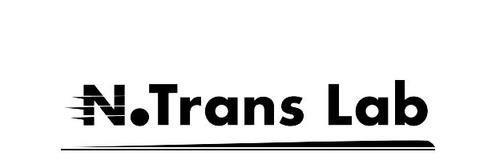

In [10]:
retriever_image = qdrant.as_retriever(search_type="mmr", 
                                search_kwargs={"k": 14,
    "filter": models.Filter(
        should=[
            models.FieldCondition(
                key="metadata.type",
                match=models.MatchValue(
                    value="image"
                ),
            ),
        ]
    )
})
retriever_image.invoke("Долевое участие металлов в EBITDA компании? То есть какой % EBITDA и EBITDA margin принесли продажи Ni, Cu и т д")

[Document(metadata={'source': 'Доклад, уголь часть 1.pdf', 'page': 1, 'type': 'image', '/Producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', '/ModDate': 'D:20241016224200Z', '/Creator': '1', '/CreationDate': 'D:20241016224200Z', '/Title': 'Доклад №1', '/Author': '1', '/Keywords': 'DAFseJ6uM3c BAFlQ5Z3D20', '/Subject': '', 'image_base64': '', '_id': '67071cb5-c285-432e-9956-d71f724052c0', '_collection_name': 'nornikel_2024_team_hakuna_matata'}, page_content='<IMG>'),
 Document(metadata={'source': 'Доклад, уголь часть 1.pdf', 'page': 13, 'type': 'text', '/Producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', '/ModDate': 'D:20241016224200Z', '/Creator': '1', '/CreationDate': 'D:20241016224200Z', '/Title': 'Доклад №1', '/Author': '1', '/Keywords': 'DAFseJ6uM3c BAFlQ5Z3D20', '/Subject': '', '_id': '4ad03c5c-ae52-4eb5-836a-9ad2aa882abb', '_collection_name': 'nornikel_2024_team_hakuna_matata'}, page_content='Рис. 18. Соотношение налоговой нагрузки и рентабельности продаж по отрасл
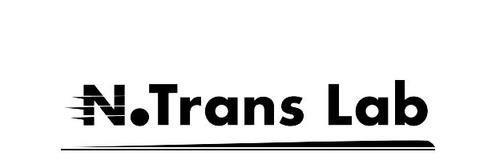

In [12]:
from langchain.retrievers.ensemble import EnsembleRetriever
ensemble_retriever = EnsembleRetriever(retrievers=[retriever_text, retriever_image],
                                      weights=[0.5, 0.5])
results = ensemble_retriever.invoke("Долевое участие металлов в EBITDA компании? То есть какой % EBITDA и EBITDA margin принесли продажи Ni, Cu и т д")
results